In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import ast
import math
import calplot

from collections import Counter
from os import path

In [2]:
data = pd.read_csv("./Movie_Clean.csv")

Simple Year Graph

In [4]:
years = []
for item in data['release_date']:
    item = ast.literal_eval(item)
    if len(item) != 0: 
        years.append(int(item[0]))

In [5]:
years.sort()

In [6]:
year_count = Counter(years)

Text(0.5, 1.0, 'Movie Releases by Year')

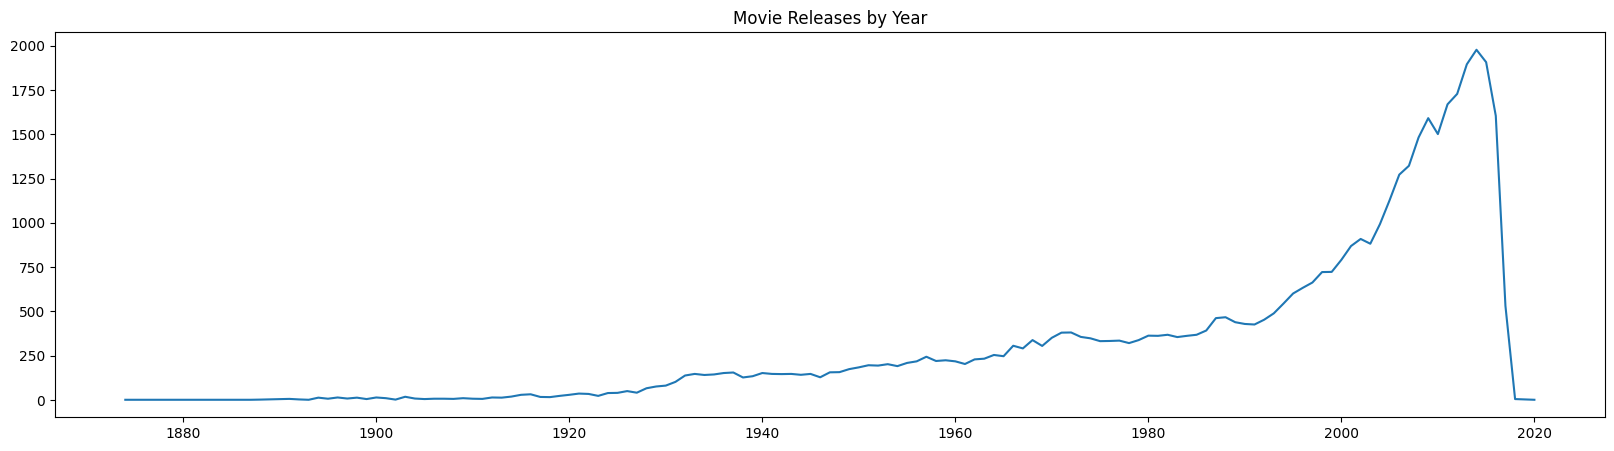

In [7]:
plt.figure(figsize=(20,5))
plt.plot(year_count.keys(), year_count.values())
plt.title("Movie Releases by Year")

All Years Heatmap

In [100]:
months = {}
for item in dates['raw']:
    item = ast.literal_eval(item)
    if len(item) != 0:
        if item[1] == '01' and item[2] == '01':
            pass
        else:
            if item[1] in months:
                day = int(item[2])
                months[item[1]][day - 1] += 1
            else:
                months[item[1]] = [0] * 31

In [102]:
year_arr = np.array([months['01'], months['02'], months['03'], months['04'], months['05'], months['06'], 
                   months['07'], months['08'], months['09'], months['10'], months['11'], months['12']])

<AxesSubplot: >

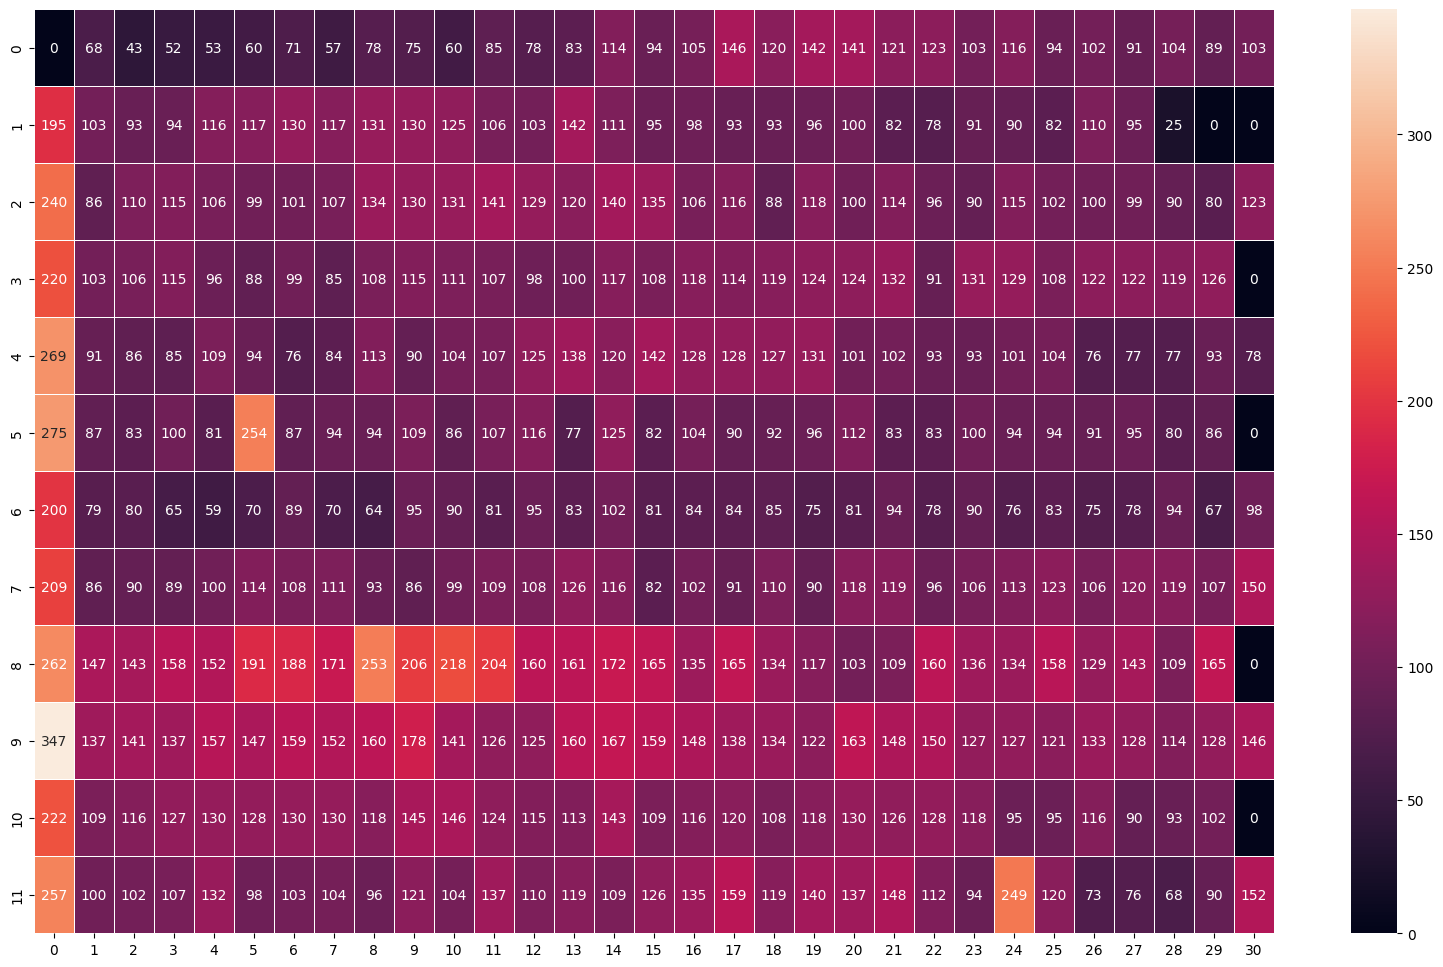

In [103]:
plt.figure(figsize = (20, 12))
sns.heatmap(data = year_arr, annot=True, linewidths=.5, fmt='n')

2000-2017 By Month Heatmap

In [134]:
ym_df = data.copy()
ym_df['year'] = 0
ym_df['month'] = 0

In [136]:
for idx in ym_df.index:
    date = ym_df.at[idx, 'release_date']
    date = ast.literal_eval(date)
    if len(date) == 0:
        ym_df = ym_df.drop(labels=idx, axis = 0)
    else:
        if (int(date[0]) > 2017) or (int(date[0]) < 2000):
            ym_df = ym_df.drop(labels=idx, axis = 0)
        else:
            ym_df.at[idx, 'year'] = int(date[0])
            ym_df.at[idx, 'month'] = int(date[1])

In [156]:
heatmap = pd.pivot_table(data = ym_df, index = 'month', columns = 'year', aggfunc = 'count', values = 'runtime')

Text(0.5, 102.72222222222219, 'Year')

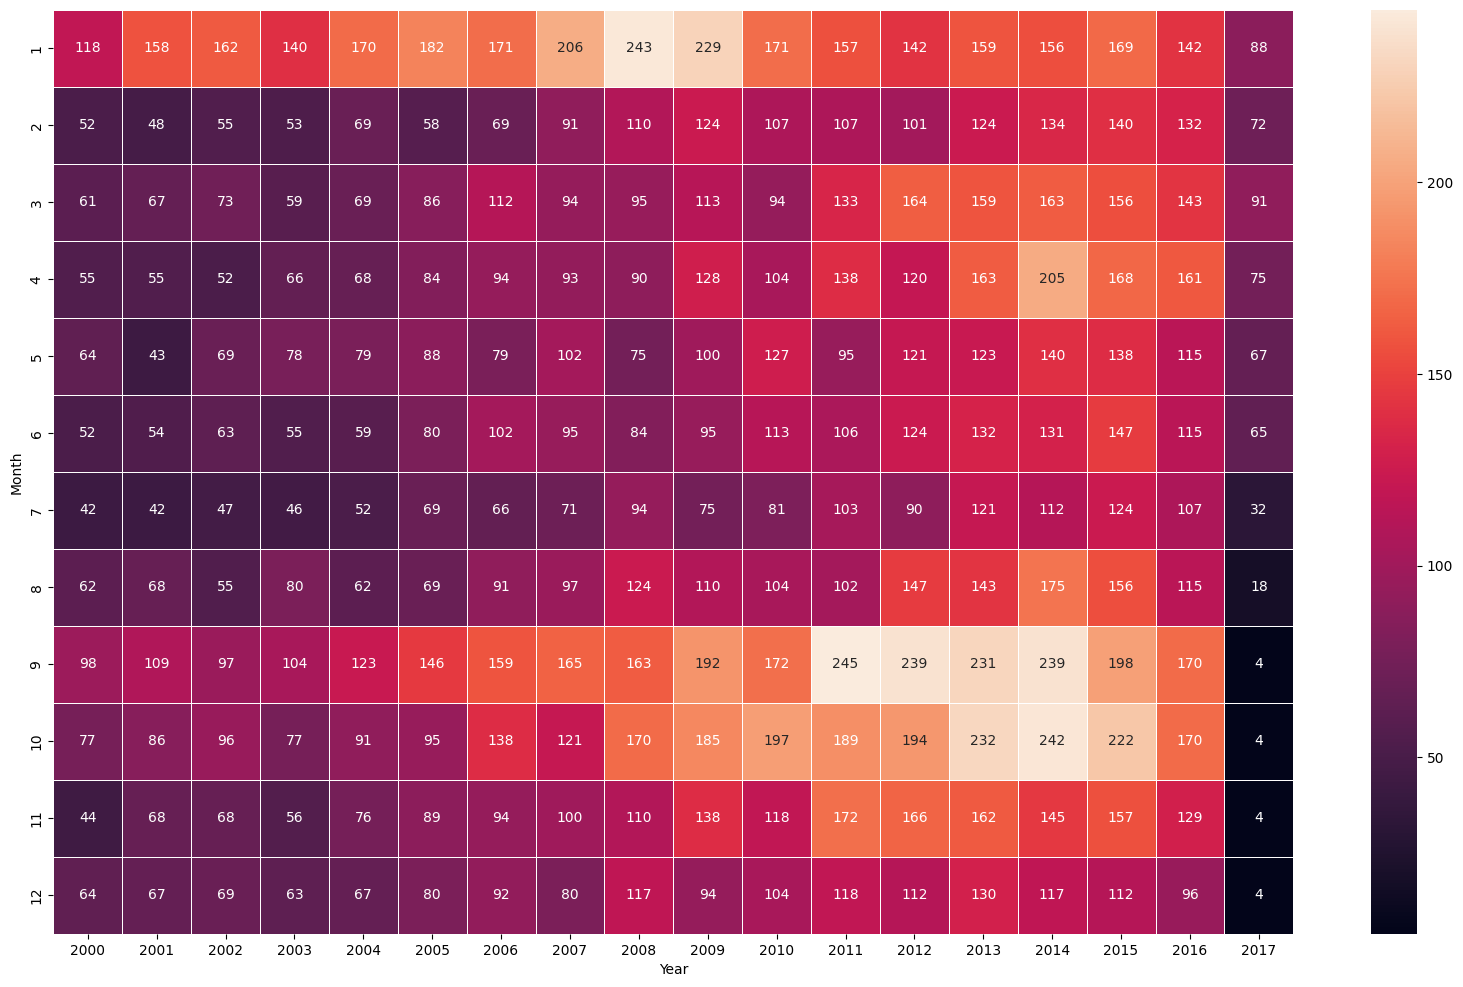

In [162]:
plt.figure(figsize = (20, 12))
sns.heatmap(data = heatmap, annot=True, linewidths=.5, fmt='n')
plt.ylabel('Month')
plt.xlabel('Year')